In [1]:
import pandas as pd

1. 一共有多少不同的用户

In [2]:
ratings = pd.read_csv('ml-25m/ratings.csv')

In [3]:
ratings['userId'].nunique()

162541

2. 一共有多少不同的电影

In [64]:
movie = pd.read_csv('ml-25m/movies.csv')

In [5]:
movie['movieId'].nunique()

62423

3. 一共有多少不同的电影种类

In [6]:
genres_list = []
for i in movie['genres']:
    if isinstance(i, str):
        genres_list.extend(i.split('|'))

In [7]:
len(set(genres_list))

20

4. 一共有多少电影没有外部链接

In [8]:
link = pd.read_csv('ml-25m/links.csv')

In [9]:
movie_link = movie.merge(link, on='movieId', how='left')

In [10]:
sum(movie_link[['imdbId', 'tmdbId']].isnull().sum(axis=1)>0)

107

5. 2018年一共有多少人进行过电影评分

In [11]:
import time

In [12]:
timestamp_start = time.mktime(time.strptime('2018-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'))

In [13]:
timestamp_end = time.mktime(time.strptime('2019-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'))

In [14]:
ratings.loc[(ratings['timestamp']>=timestamp_start) & (ratings['timestamp']<timestamp_end), 'userId'].nunique()

11999

6. 2018年评分5分以上的电影及其对应的标签

In [31]:
tags = pd.read_csv('ml-25m/tags.csv')

In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [40]:
movie_ratings = ratings.merge(movie, on='movieId', how='inner')

In [41]:
movie_ratings = movie_ratings.loc[(movie_ratings['timestamp']>=timestamp_start) & (movie_ratings['timestamp']<timestamp_end) &(movie_ratings['rating']>=5), ['title','genres','userId','movieId']]

In [42]:
result = movie_ratings.merge(tags, on=['userId','movieId'], how='left')

In [46]:
result = result[['title', 'tag']]

In [47]:
result.head()

,title,tag
0,Pulp Fiction (1994),NaN
1,Pulp Fiction (1994),NaN
2,Pulp Fiction (1994),Black comedy
3,Pulp Fiction (1994),cult film
4,Pulp Fiction (1994),dark comedy


7. 绘制电影复仇者联盟（The Avengers）每个月评分的平均值变化曲线图

In [76]:
movie.loc[movie['title'].apply(lambda x: x.find('Avengers')!=-1)]
# The Avengers's movieId is 89745

,movieId,title,genres
2063,2153,"Avengers, The (1998)",Action|Adventure
17067,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX
22599,115727,Crippled Avengers (Can que) (Return of the 5 D...,Action|Adventure
25058,122892,Avengers: Age of Ultron (2015),Action|Adventure|Sci-Fi
25067,122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi
25068,122914,Avengers: Infinity War - Part II (2019),Action|Adventure|Sci-Fi
30333,135979,Next Avengers: Heroes of Tomorrow (2008),Action|Animation|Children|Sci-Fi
30431,136257,Avengers Grimm (2015),Action|Adventure|Fantasy
34536,145676,3 Avengers (1964),(no genres listed)
35219,147238,The New Adventures of the Elusive Avengers (1968),Action|Adventure|Children


In [80]:
from datetime import datetime

In [85]:
ratings = ratings.loc[ratings['movieId']==89745]

In [86]:
ratings['date'] = ratings['timestamp'].apply(lambda x:datetime.strftime(datetime.fromtimestamp(x),'%Y-%m'))

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
result = ratings.groupby('date').agg({'rating': 'mean'})

In [91]:
result.head()

,rating
date,
2011-09,4.000000
2012-04,4.375000
2012-05,4.186158
2012-06,4.161088
2012-07,4.130556


In [90]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x2d765c16588>,
 <a list of 8 Text xticklabel objects>)

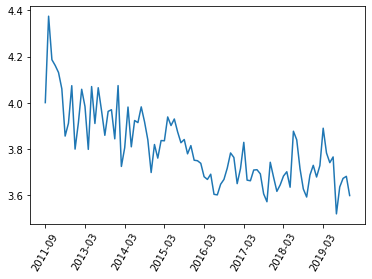

In [94]:
plt.plot(result.index, result['rating'])
plt.xticks(range(0, result.shape[0], 12), rotation=60)